In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load the grayscale image
image_path = "/media/tairo/Storages/CodeThayTien/XLA/ImgTest/OIP.jpeg"
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


In [13]:
# Perform FFT to transform the image to the frequency domain
f_transform = np.fft.fft2(gray_image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Get the dimensions of the image
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2  # Center coordinates

# Define more cutoff frequencies for broader visualization
cutoff_frequencies = [5, 15, 30, 50, 75, 100, 150, 200]

plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

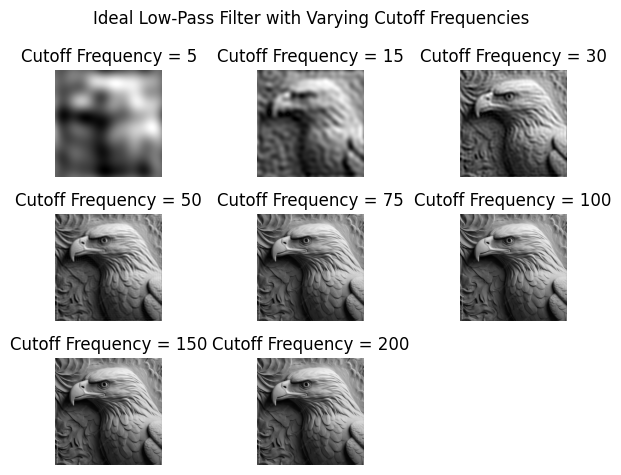

In [14]:
for i, cutoff in enumerate(cutoff_frequencies):
    # Create an Ideal Low-Pass Filter mask
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), cutoff, 1, thickness=-1)

    # Apply the mask to the shifted FFT
    filtered_shifted = f_transform_shifted * mask

    # Perform the inverse FFT to get the filtered image back in spatial domain
    inverse_shifted = np.fft.ifftshift(filtered_shifted)
    filtered_image = np.fft.ifft2(inverse_shifted)
    filtered_image = np.abs(filtered_image)

    # Plot the filtered image
    plt.subplot(3, 3, i + 1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Cutoff Frequency = {cutoff}')
    plt.axis('off')

plt.suptitle('Ideal Low-Pass Filter with Varying Cutoff Frequencies')
plt.tight_layout()
plt.show()